In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

In [ ]:
data_digit = load_digits()

In [ ]:
X,y=data_digit.data,data_digit.target

In [ ]:
X.shape

(1797, 64)

In [ ]:
y.shape

(1797,)

In [ ]:
X_train ,X_test ,y_train ,y_test =train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=models.Sequential([
    layers.Dense(units=50, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(units=37,activation='relu'),
    layers.Dense(units=21,activation='relu'),
    layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 37)             │         1,887 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 21)             │           798 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │           220 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,155 (24.04 KB)

 Trainable params: 6,155 (24.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
loss_hist=model.fit(
    X_train,
    y_train,
    epochs = 100,
    validation_data = (X_test,y_test),
    verbose=1
)

Epoch 1/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1545 - loss: 2.3558 - val_accuracy: 0.4417 - val_loss: 1.9092
Epoch 2/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4539 - loss: 1.7879 - val_accuracy: 0.7389 - val_loss: 1.1619
Epoch 3/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6778 - loss: 1.1385 - val_accuracy: 0.8806 - val_loss: 0.5641
Epoch 4/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8232 - loss: 0.6354 - val_accuracy: 0.9222 - val_loss: 0.3352
Epoch 5/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8662 - loss: 0.4587 - val_accuracy: 0.9278 - val_loss: 0.2518
Epoch 6/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8938 - loss: 0.3612 - val_accuracy: 0.9528 - val_loss: 0.1946
Epoch 7/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9126 - loss: 0.2882 - val_accuracy: 0.9556 - val_loss: 0.1659
Epoch 8/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9317 - loss: 0.2390 - val_accuracy: 0.9556 - v

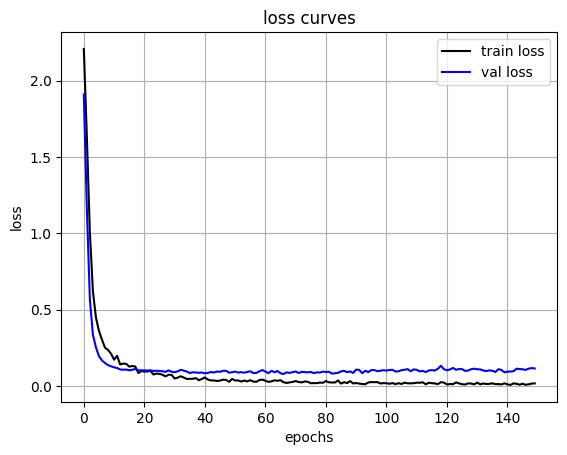

In [ ]:
plt.plot(loss_hist.history['loss'],label='train loss',color='black')
plt.plot(loss_hist.history['val_loss'],label='val loss',color='blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss curves')
plt.grid(True)
plt.legend()
plt.show()

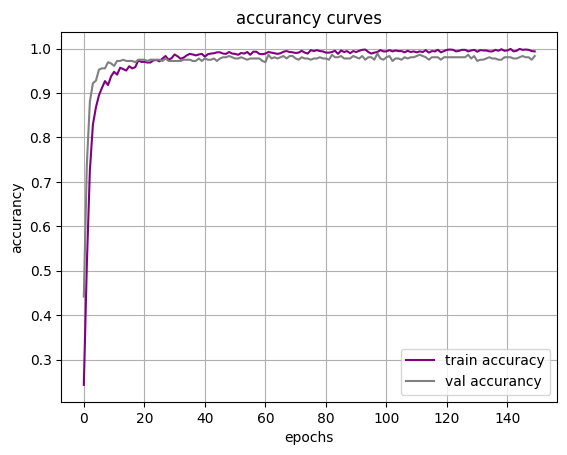

In [ ]:
plt.plot(loss_hist.history['accuracy'],label='train accuracy',color='purple')
plt.plot(loss_hist.history['val_accuracy'],label='val accurancy',color='grey')
plt.xlabel('epochs')
plt.ylabel('accurancy')
plt.title('accurancy curves')
plt.legend()
plt.grid(True)
plt.show()